**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: Sebastián Torres Franco

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [212]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [20]:
# Se carga el archivo a partir de la unidad de GDrive
from google.colab import drive
drive.mount('/content/gdrive')
happiness=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ArchivosCarga/happiness_report.csv') #Lectura del archivo en el DataFrame
happiness.head(5) #Impresión de Dataframe resultante

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice.

In [213]:
#Se realiza lo solicitado filtrando por el país Mexico. Asignando la columna Country or region como índice, y por último borrando columna Overall Rank
mexico=(happiness[happiness['Country or region']=='Mexico'].set_index('Country or region')).drop('Overall rank',axis=1)
mexico

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,
Mexico,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

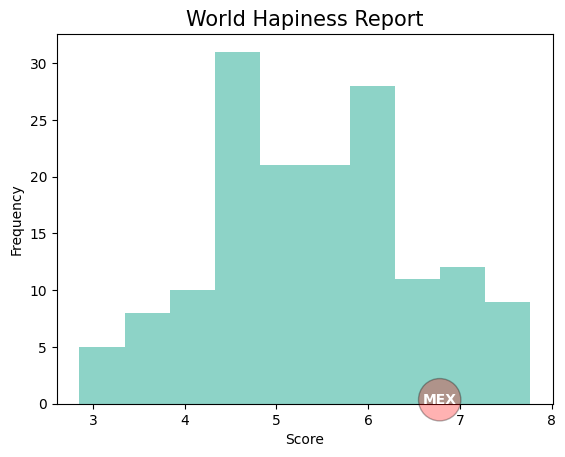

In [214]:
#Se grafica el histograma con la plataforma Pandas

                                    #Impresión histograma:
#Elección del color
facecolor=sns.color_palette("Set3", 9)[0] #Se toma el color de una paleta que creo coincide con la presentada en el ejercicio
scorehist=happiness['Score'].plot.hist(color=facecolor) #Se grafica el histograma
#Edición de la gráfica
scorehist.set_xlabel('Score')
scorehist.set_title('World Hapiness Report',fontdict={'size':15});

                                    #texto de méxico
#Se crea el diccionario con las propiedades de la enmarcación, y la fuente
enmarcation={'boxstyle': 'circle',
'facecolor': 'red',
'alpha': 0.3}

text_prop={'weight':'bold',
           'color':'white',
           'size':10}


#Se crea el texto sobre la gráfica
plt.text(mexico['Score'],0,'MEX',bbox=enmarcation,fontdict=text_prop);

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

Text(1.2, Country or region
Mexico    0.861
Name: Healthy life expectancy, dtype: float64, 'MEX')

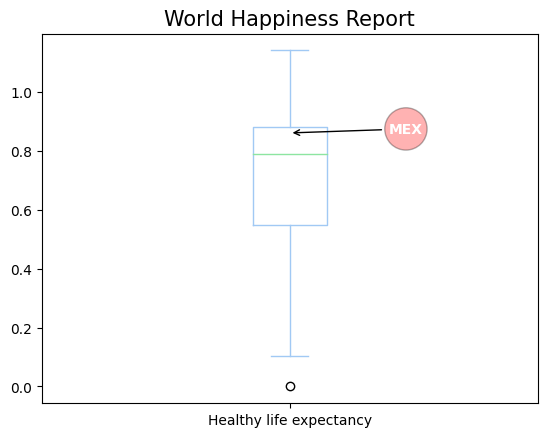

In [215]:
# Se grafica el boxplot usando la plataforma Pandas

                                #Impresión de gráfica
healthbox=happiness['Healthy life expectancy'].plot.box()
#Edición del título
healthbox.set_title('World Happiness Report',fontdict={'size':15})

                                #Se crea la anotación
valmex=mexico['Healthy life expectancy']
plt.annotate('MEX',xy=(1,valmex),xytext=(1.2,valmex),arrowprops={'arrowstyle':'->'},bbox=enmarcation,color='white',weight='bold')

6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

,Factors
,
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


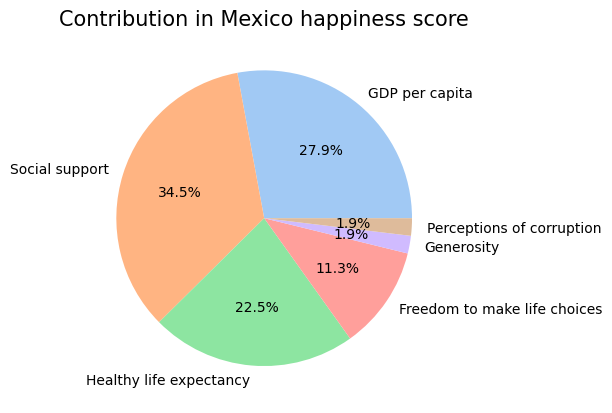

In [217]:
                                          #Se crea el dataframe modificado
contrib_mexico=mexico.T.drop('Score',axis=0)
contrib_mexico.index.name=''
contrib_mexico.columns=['Factors']

                                          #Impresión del pie con Pandas
sns.set_palette('pastel')# Set del estilo
pie_mex=contrib_mexico.plot.pie(y='Factors',legend=False,ylabel='',autopct='%1.1f%%') #Impresión del pie
pie_mex.set_title('Contribution in Mexico happiness score',fontdict={'size':15}) #Modificación del título

#Impresión de la tabla resultante
contrib_mexico


7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

,Finland,Mexico,Colombia,Argentina,South Sudan
Factor,,,,,
GDP per capita,1.340,1.070,0.985,1.092,0.306
Social support,1.587,1.323,1.410,1.432,0.575
Healthy life expectancy,0.986,0.861,0.841,0.881,0.295
Freedom to make life choices,0.596,0.433,0.470,0.471,0.010
Generosity,0.153,0.074,0.099,0.066,0.202
Perceptions of corruption,0.393,0.073,0.034,0.050,0.091


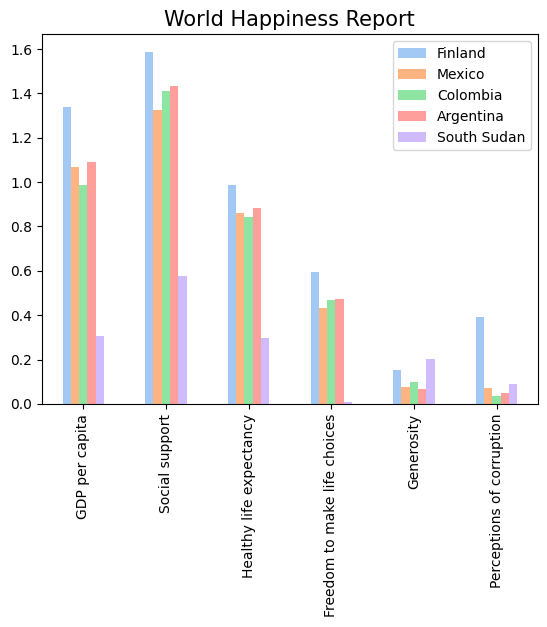

In [218]:
                    #Se filtra el dataframe para encontrar los países más felices, y menos felices

#Se ordena el dataframe a partir de la columna Overall Rank Para asegurar el orden de la lsita
happiness.sort_values(by='Overall rank')

#Se crea una lista concatenada con el país con mayor índice, el menor, México, Colombia, y Argentina
countries_list=happiness.iloc[[0,happiness.shape[0]-1],1].tolist() + ['Mexico','Colombia','Argentina']

#Se filtra el Dataframe de acuerdo con la lista anterior, se toman las columnas a la derecha de "Country or Region", y finalmente redefinimos el índice
countries_hi=(happiness[happiness['Country or region'].isin(countries_list)]).iloc[:,1:].set_index('Country or region')

countries_hi.drop('Score',axis=1,inplace=True) #Se borra la columna score
countries_hi=countries_hi.T                    #Por el formato buscado se transpone la gráfica
countries_hi.columns.name=''                   #Se limpia el nombre de las columnas
countries_hi.index.name='Factor'               #Se renombra el índice del dataframe resultante

                    #Se crea la figura y se edita el tamaño del título
countries_bar=countries_hi.plot.bar(xlabel='')
countries_bar.set_title('World Happiness Report',fontdict={'size':15})
#Impresión del dataframe usado.
countries_hi

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

Se pudee observar que las variables con mayor correlación con el puntaje son el GDP per capita, Social support, y Healthy life expectancy 



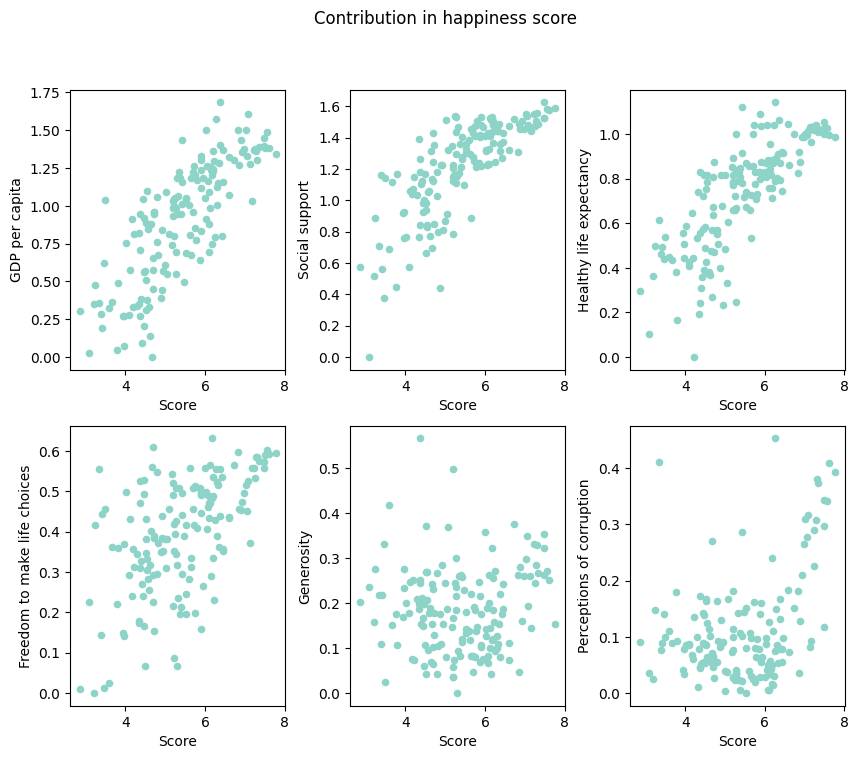

In [177]:
                                #Se grafica la rejilla de dispersión usando Pandas
# Se crea la rejilla de subplots
fig,axs=plt.subplots(2,3,figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)
fig.suptitle('Contribution in happiness score')

#Se itera a través de la rejilla graficando los subplots
#Se usa el color anteriormente manejado para los histogramas
colcount=0 #Se define un contador para recorrer las columnas del dataframe happiness
for j in range(2):
    for i in range(3):
        if i<=2:
           happiness.plot.scatter(y=happiness.columns[3+colcount],x='Score',ax=axs[j,i],color=facecolor)
        else:
           happiness.plot.scatter(y=happiness.columns[3+colcount],x='Score',ax=axs[j,i],color=facecolor)
        colcount=colcount+1


print('Se pudee observar que las variables con mayor correlación con el puntaje son el GDP per capita, Social support, y Healthy life expectancy \n')

9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

<ipython-input-223-6215cb681417>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(happiness.corr(),annot=True)


Se obtienen resultados acordes a lo mencionado con los diagramas de dispersión


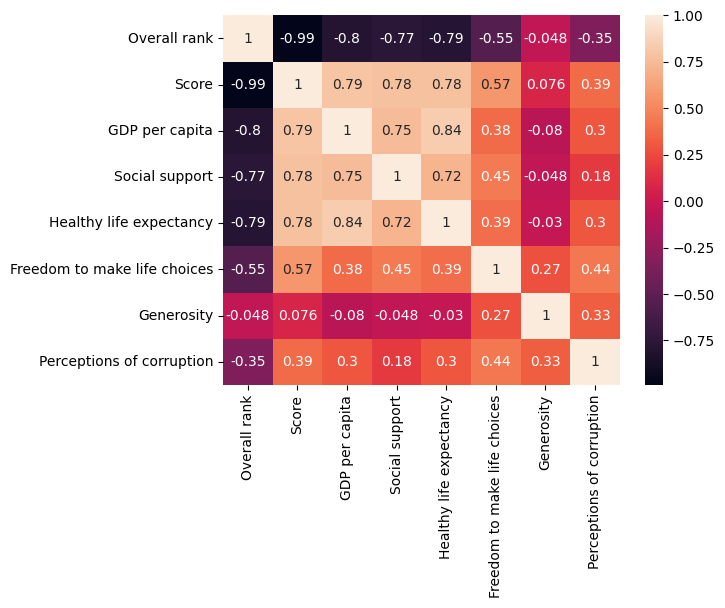

In [223]:
#Se grafica el heatmape usando seaborn
sns.heatmap(happiness.corr(),annot=True)

print('Se obtienen resultados acordes a lo mencionado con los diagramas de dispersión')

10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región.

,Score
Region,
East Asia & Pacific,5.658769
Europe & Central Asia,6.104174
Latin America & Caribbean,6.007579
Middle East & North Africa,5.757429
North America,7.085000
South Asia,4.526857
Sub-Saharan Africa,4.260000


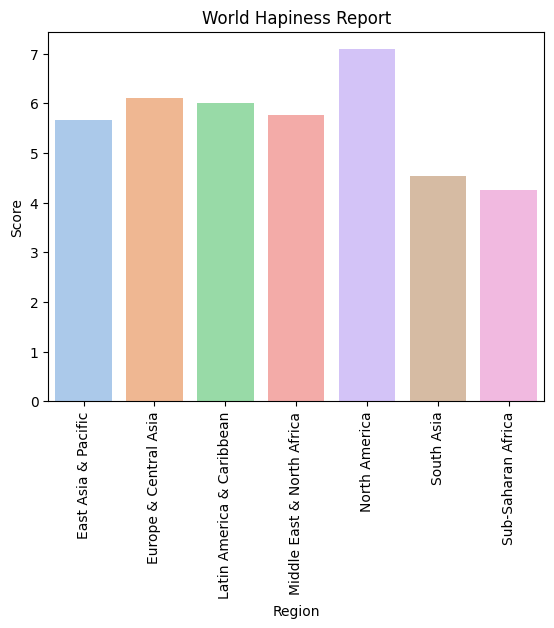

In [211]:
#Se carga el archivo
metadata=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ArchivosCarga/Metadata.csv')

#Se realiza el merge entre los dataframes metadata y happiness para calcular el promedio
happiness_region=happiness.merge(metadata[['TableName','Region']], how='left',left_on='Country or region',right_on='TableName')

#Se agrupa por región y se calcula la media
happiness_region=happiness_region[['Score','Region']].groupby('Region').mean()

#Se edita para llegar al axpecto buscado
sns.barplot(data=happiness_region,y='Score',x=happiness_region.index)
plt.xticks(rotation=90)
plt.title('World Hapiness Report')

#Impresión del dataframe graficado
happiness_region